In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
from sklearn.tree import export_graphviz
import pydot
from matplotlib import pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [26]:
#assess the efficacy of the hyperparameter search
def evaluate(model, test_features, test_labels,name):
    predictions = model.predict(test_features)
    np.savetxt("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/random_forest/outputs/" + name +"_current_predictions_no_zeros_classifier.csv", predictions, delimiter=",",fmt="%s",  header = 'RISK')
    accuracy = accuracy_score(test_labels, predictions)
    confusion = confusion_matrix(test_labels, predictions)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    confusion[[1,2]] = confusion[[2,1]]
    confusion = confusion[:, [0, 2, 1]]
    sns.heatmap(confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis], annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)
    class_names = ['HIGH', 'MEDIUM', 'LOW']
    tick_marks = np.arange(len(class_names)) +0.5
    if len(test_features) == 1122:
        plt.xticks(tick_marks, class_names, rotation=0) 
        tick_marks = np.arange(len(class_names)+1) +0.5        
        plt.yticks(tick_marks, class_names + ['NONE'] , rotation=0)
    else: 
        tick_marks = np.arange(len(class_names)) +0.5
        plt.xticks(tick_marks, class_names, rotation=0)
        plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Projected risk')
    plt.ylabel('Current risk')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()


    # print(confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis])
    report = classification_report(test_labels, predictions)
    
    return accuracy, confusion, report

In [24]:
#creating example of the decision trees that are made
rf = joblib.load("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/random_forest/outputs/base_model_no_zeros_classifier.joblib")
global rf
current_predictions = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories.csv")['RISK']


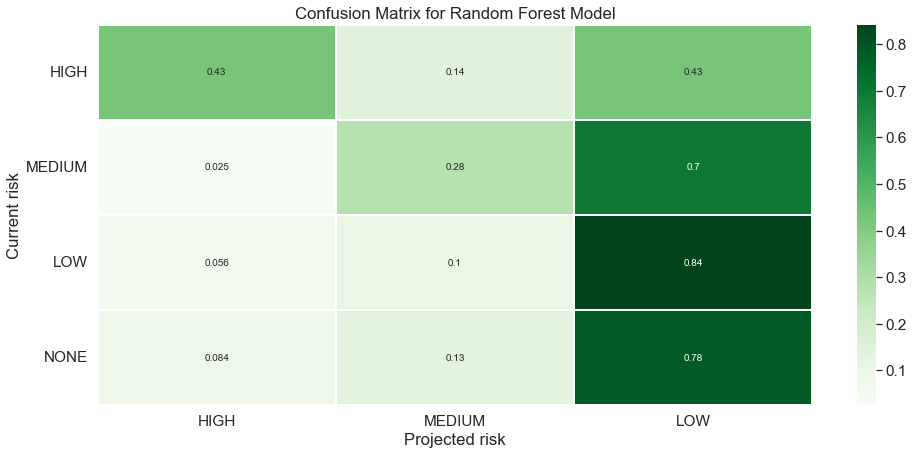

/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

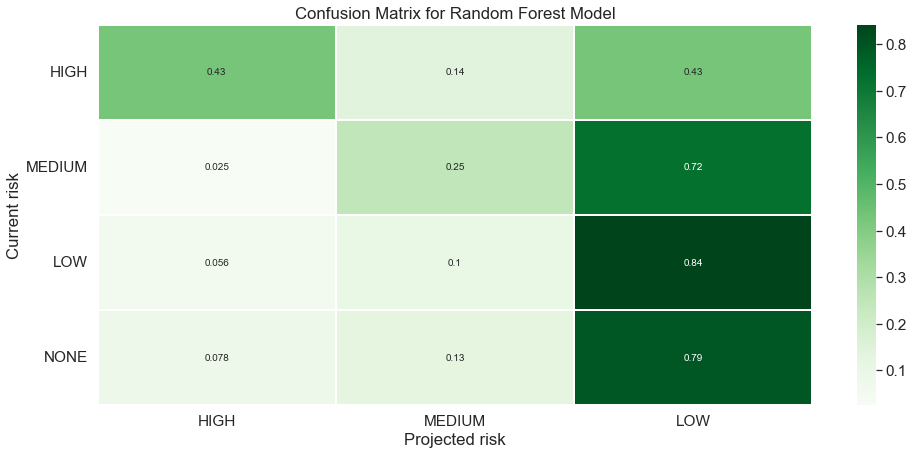

/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [27]:
#load future data
for i in ['245', '585']:
    features = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/" + i + "/model1/rf_projection_input.csv")[["SVI", "POP_DENS","SUITABILITY_MEAN"]]
    features = np.array(features)
    evaluate(rf, features, current_predictions, i)


In [10]:
# create prediction for entire country using model
file = '/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories.csv'
labels, features, feature_list  = creating_features_labels(file)
print(len(labels))
base_country_accuracy, base_country_confusion, base_country_report = evaluate(base_model, features, labels, "final_entire_country")
print('base_country_accuracy = {:0.2f}%.'.format(base_country_accuracy*100))
print(base_country_report)

NameError: name 'creating_features_labels' is not defined